In [1]:
import pandas as pd
import numpy as np

# Loading the given dataset!! from local drive!
path=r"C:\Users\Abid.MD\Desktop\Gradious Assignment\Projects\Mini Project\online_shoppers_intention.csv"
df=pd.read_csv(path)

In [2]:
"""
checking whether given data features have a correlation between target vairable or not!

checking correlation between variables to identify the relavent feature
"""
correlation_matrix=df.corr(numeric_only=True)
target_correlation=correlation_matrix['MadePurchase'].sort_values(ascending=False)
print("Correlation with 'MadePurchase' Target Variable:")
print(target_correlation)


Correlation with 'MadePurchase' Target Variable:
MadePurchase             1.000000
AvgPageValue             0.492569
ProductPagesViewed       0.158538
ProductPageTime          0.152373
AcctPagesViewed          0.138917
InfoPagesViewed          0.095200
AcctPageTime             0.093587
InfoPageTime             0.070345
IsWeekendVisit           0.029295
UserBrowser              0.023984
SourceChannel           -0.005113
UserRegion              -0.011595
UserOS                  -0.014668
ProximityToSpecialDay   -0.082305
AvgBounceRate           -0.150673
AvgExitRate             -0.207071
Name: MadePurchase, dtype: float64


In [3]:
"""
from the correlation values determining which features are irrelevant to the target variable and dropping them!
correlation of almost 0 are dropped!
"""
df=df.drop(columns="SourceChannel")
df = df.dropna()

In [4]:
"""
importing standard scaler and label encoder to encode the categorical values 
"""
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [5]:
"""
categorical features present in the given dataset
"""
cat=["VisitMonth","UserCategory","IsWeekendVisit","MadePurchase"]

""" instead of applying tthe same scalling or encodeing method to all the categorical features,
I am applying different methods based of the features!!"""


"""
for months feature(cyclic feature) i will be using numbers from 1 to 12!!
"""
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['VisitMonth'] = df['VisitMonth'].map(month_map)

"""applying label encoding to other features!!(categorical features)"""
df['UserCategory'] = le.fit_transform(df['UserCategory'])
df['IsWeekendVisit'] = df['IsWeekendVisit'].astype(int)
df['MadePurchase'] = df['MadePurchase'].astype(int)



In [6]:
"""
importing the train test split method to split the dataset!!
"""
from sklearn.model_selection import train_test_split

"""
defining the target and features!!"""
X=df.drop(columns="MadePurchase")
y=df["MadePurchase"]


s=sum(y)
print(s)

1908


In [7]:
"""
sum of target variable is 1043 which means the data is imbalanced!!
so I will be using SMOTE to balance the data!!
"""


X_train,X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2)

"""
applying SMOTE to balance the data!!
"""
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [8]:
"""
verifiying the shapes of the train and test splits!!!
"""
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16734, 16)
(2466, 16)
(16734,)
(2466,)


In [9]:
"""
applying the  logistic regression model to the given dataset!!
"""
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

model1=LogisticRegression(max_iter=1000000)
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
ac=accuracy_score(y_pred,y_test)
print("Logistic Regression accuracy")
print(ac)

Logistic Regression accuracy
0.8556366585563666


C:\Users\Abid.MD\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 12654 iteration(s) (status=1):
STOP: TOTAL NO. OF F,G EVALUATIONS EXCEEDS LIMIT

You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
"""
applying Random forest classifier to the given dataset!!
"""
from sklearn.ensemble import RandomForestClassifier

model2=RandomForestClassifier()
model2.fit(X_train,y_train)
y2_pred=model2.predict(X_test)
# from sklearn.metrics import accuracy_score
# print("accuracy of Random forest")
ac2=accuracy_score(y2_pred,y_test)
print("Random Forest accuracy")
print(ac2)

Random Forest accuracy
0.8872668288726683


In [11]:
"""
applying Gradiedt Boosting classifier to the given dataset!!
"""
from sklearn.ensemble import GradientBoostingClassifier

model3=GradientBoostingClassifier()
model3.fit(X_train,y_train)
y3_pred=model3.predict(X_test)
# from sklearn.metrics import accuracy_score
print("accuracy of Gradient Boosting")
ac3=accuracy_score(y3_pred,y_test)
print(ac3)

accuracy of Gradient Boosting
0.8819951338199513


In [12]:
"""
applying XGBoost classifier to the given dataset!!
"""
from xgboost import XGBClassifier

model4=XGBClassifier()
model4.fit(X_train,y_train)
y4_pred=model4.predict(X_test)
# from sklearn.metrics import accuracy_score
print("accuracy of XGBoost")
ac4=accuracy_score(y4_pred,y_test)
print(ac4)

accuracy of XGBoost
0.8803730738037308


In [13]:
"""
Accuracy, Recall, Precision, F1-Score for all models"""
from sklearn.metrics import classification_report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred))

print("Classification Report for Random Forest:")
print(classification_report(y_test, y2_pred))

print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y3_pred))

print("Classification Report for XGBoost:")         
print(classification_report(y_test, y4_pred))

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2055
           1       0.55      0.69      0.61       411

    accuracy                           0.86      2466
   macro avg       0.74      0.79      0.76      2466
weighted avg       0.87      0.86      0.86      2466

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2055
           1       0.64      0.72      0.68       411

    accuracy                           0.89      2466
   macro avg       0.79      0.82      0.81      2466
weighted avg       0.89      0.89      0.89      2466

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2055
           1       0.62      0.74      0.68       411

    accuracy                           0.88      

Logistic Regression AUC: 0.8664085578465673
Random Forest AUC: 0.9224448114799225
Gradient Boosting AUC: 0.9213999443526855
XGBoost AUC: 0.9103663842861456


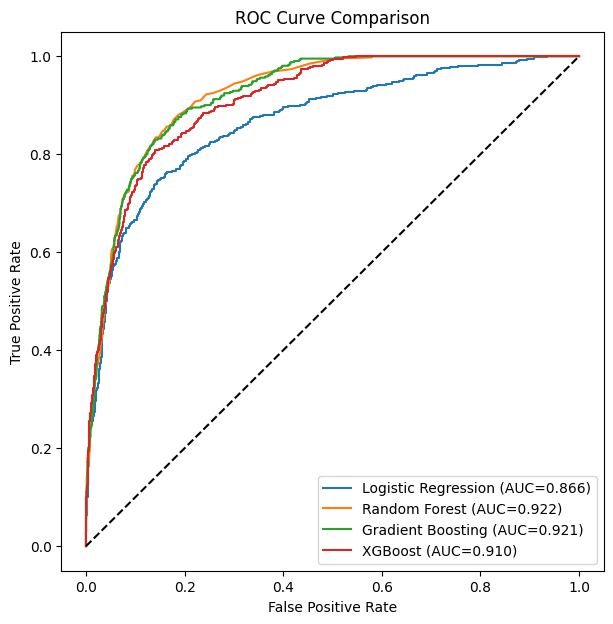

In [14]:

"""
ROC curve and AUC for all four models
"""
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

"""
getting probability of prediction of positive classes for all four models
"""
y_prob_log = model1.predict_proba(X_test)[:,1]
y_prob_rf  = model2.predict_proba(X_test)[:,1]
y_prob_gb  = model3.predict_proba(X_test)[:,1]
y_prob_xgb = model4.predict_proba(X_test)[:,1]

"""
finding the AUC scores for all four models
"""
auc_log=roc_auc_score(y_test, y_prob_log)
auc_rf=roc_auc_score(y_test, y_prob_rf)
auc_gb=roc_auc_score(y_test, y_prob_gb)
auc_xgb=roc_auc_score(y_test, y_prob_xgb)

print("Logistic Regression AUC:", auc_log)
print("Random Forest AUC:", auc_rf)
print("Gradient Boosting AUC:", auc_gb)
print("XGBoost AUC:", auc_xgb)

"""
plotting the ROC curves for all four models
"""
plt.figure(figsize=(7,7))

fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _   = roc_curve(y_test, y_prob_rf)
fpr_gb, tpr_gb, _   = roc_curve(y_test, y_prob_gb)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC={auc_log:.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC={auc_rf:.3f})")
plt.plot(fpr_gb, tpr_gb, label=f"Gradient Boosting (AUC={auc_gb:.3f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC={auc_xgb:.3f})")



"""reference line"""
plt.plot([0,1],[0,1],'k--') 


plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()
